In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
!pip install catboost
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, GradientBoostingRegressor, VotingRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, BatchNormalization
#!pip install scikit-garden
#from statsmodels.tsa.arima.model import ARIMA
#from skgarden import MondrianForestRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seoul-bike-rental-ai-pro-iti/sample_submission.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv
/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv


## EDA

### Data Shape

In [2]:
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
edf = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print('Number of instances, features', df.shape)

Number of instances, features (5760, 15)


### Data Peek

In [3]:
print(df.head())

   ID        Date    y  Hour  Temperature(�C)  Humidity(%)  Wind speed (m/s)  \
0   0  01/12/2017  254     0             -5.2           37               2.2   
1   1  01/12/2017  204     1             -5.5           38               0.8   
2   2  01/12/2017  173     2             -6.0           39               1.0   
3   3  01/12/2017  107     3             -6.2           40               0.9   
4   4  01/12/2017   78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(�C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  

### Data Information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

### Data Description

In [5]:
print(df.describe())

                ID            y         Hour  Temperature(�C)  Humidity(%)  \
count  5760.000000  5760.000000  5760.000000      5760.000000  5760.000000   
mean   2879.500000   703.483854    11.500000        12.803559    58.361806   
std    1662.913107   655.249491     6.922788        11.902206    19.840167   
min       0.000000     0.000000     0.000000       -15.100000     0.000000   
25%    1439.750000   188.000000     5.750000         3.200000    43.000000   
50%    2879.500000   485.500000    11.500000        13.700000    57.000000   
75%    4319.250000  1066.000000    17.250000        22.225000    73.000000   
max    5759.000000  3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
count       5760.000000       5760.000000                5760.000000   
mean           1.723333       1473.711458                   4.058264   
std            1.047898        585.879880                  13.003582   
min      

### Identify Duplicates

In [6]:
dups = df.duplicated()
print(dups.any())

False


## Data Visualization

### Features' Distribution

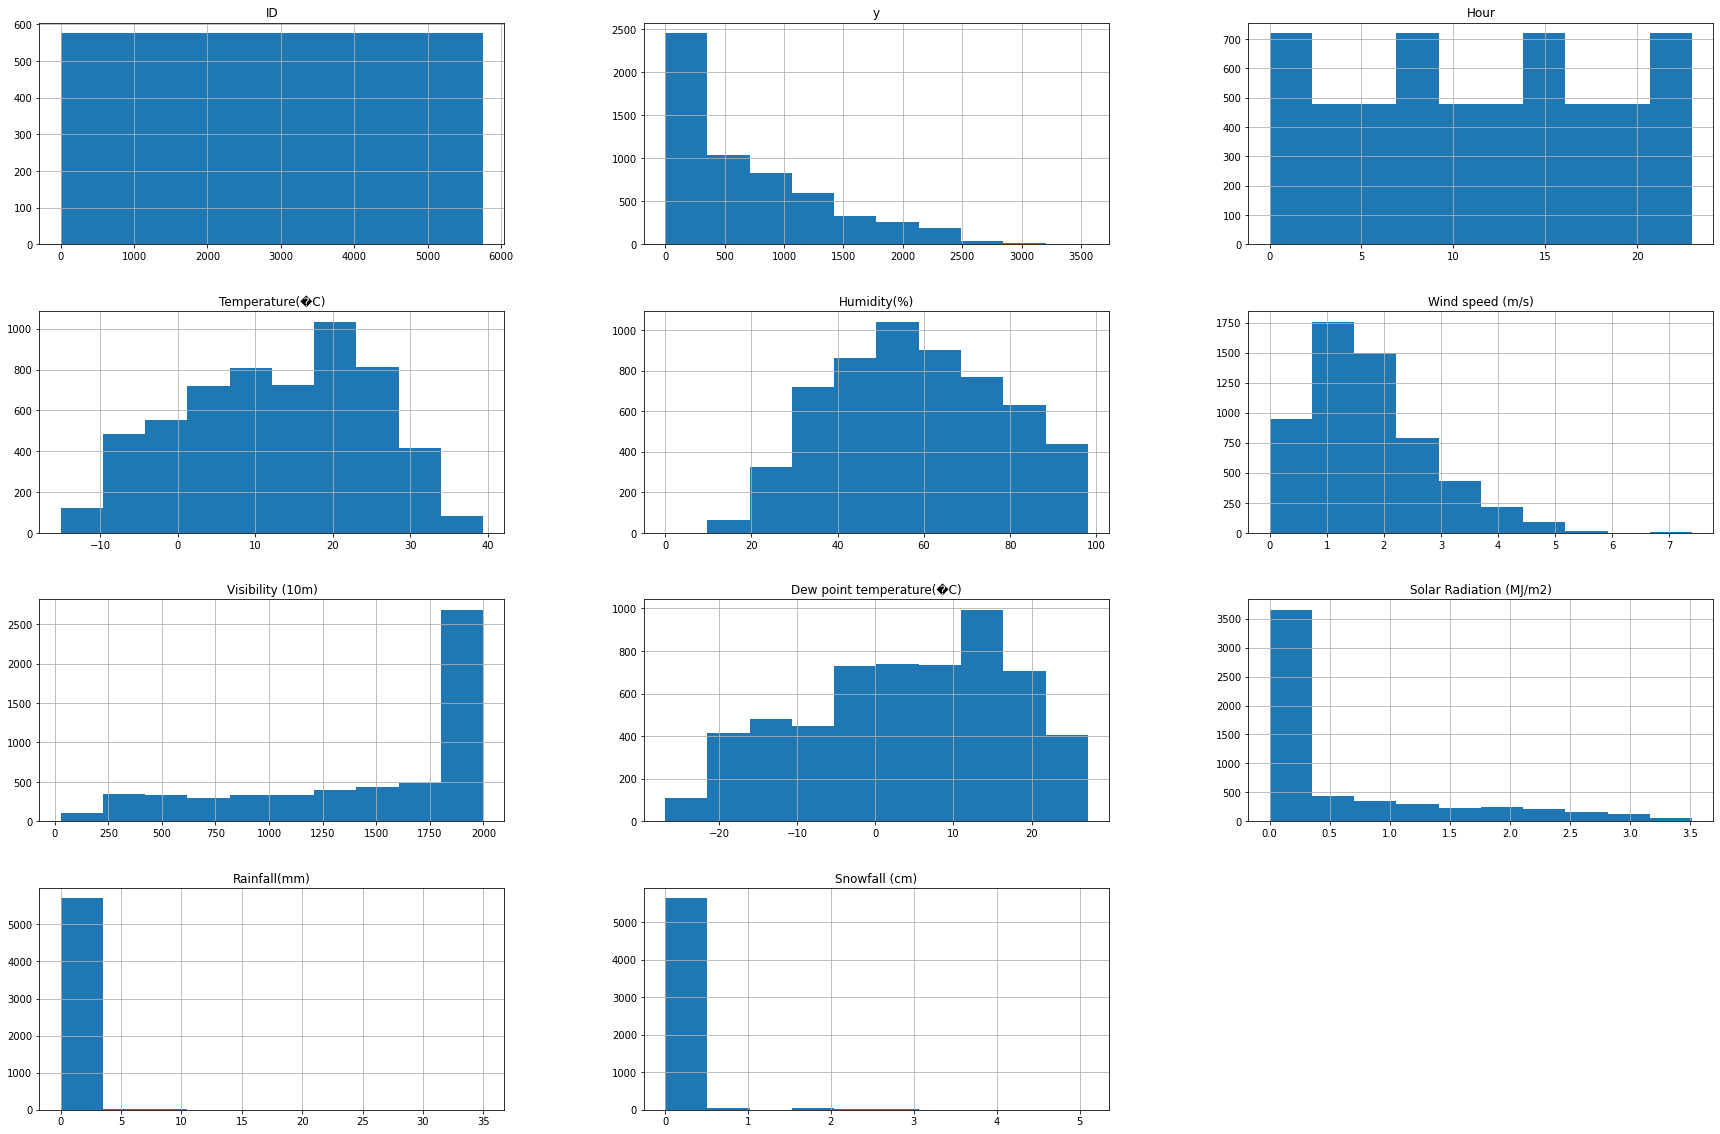

In [7]:
df.hist(figsize = (30,20))
plt.show()

### Scatter Plot Matrix

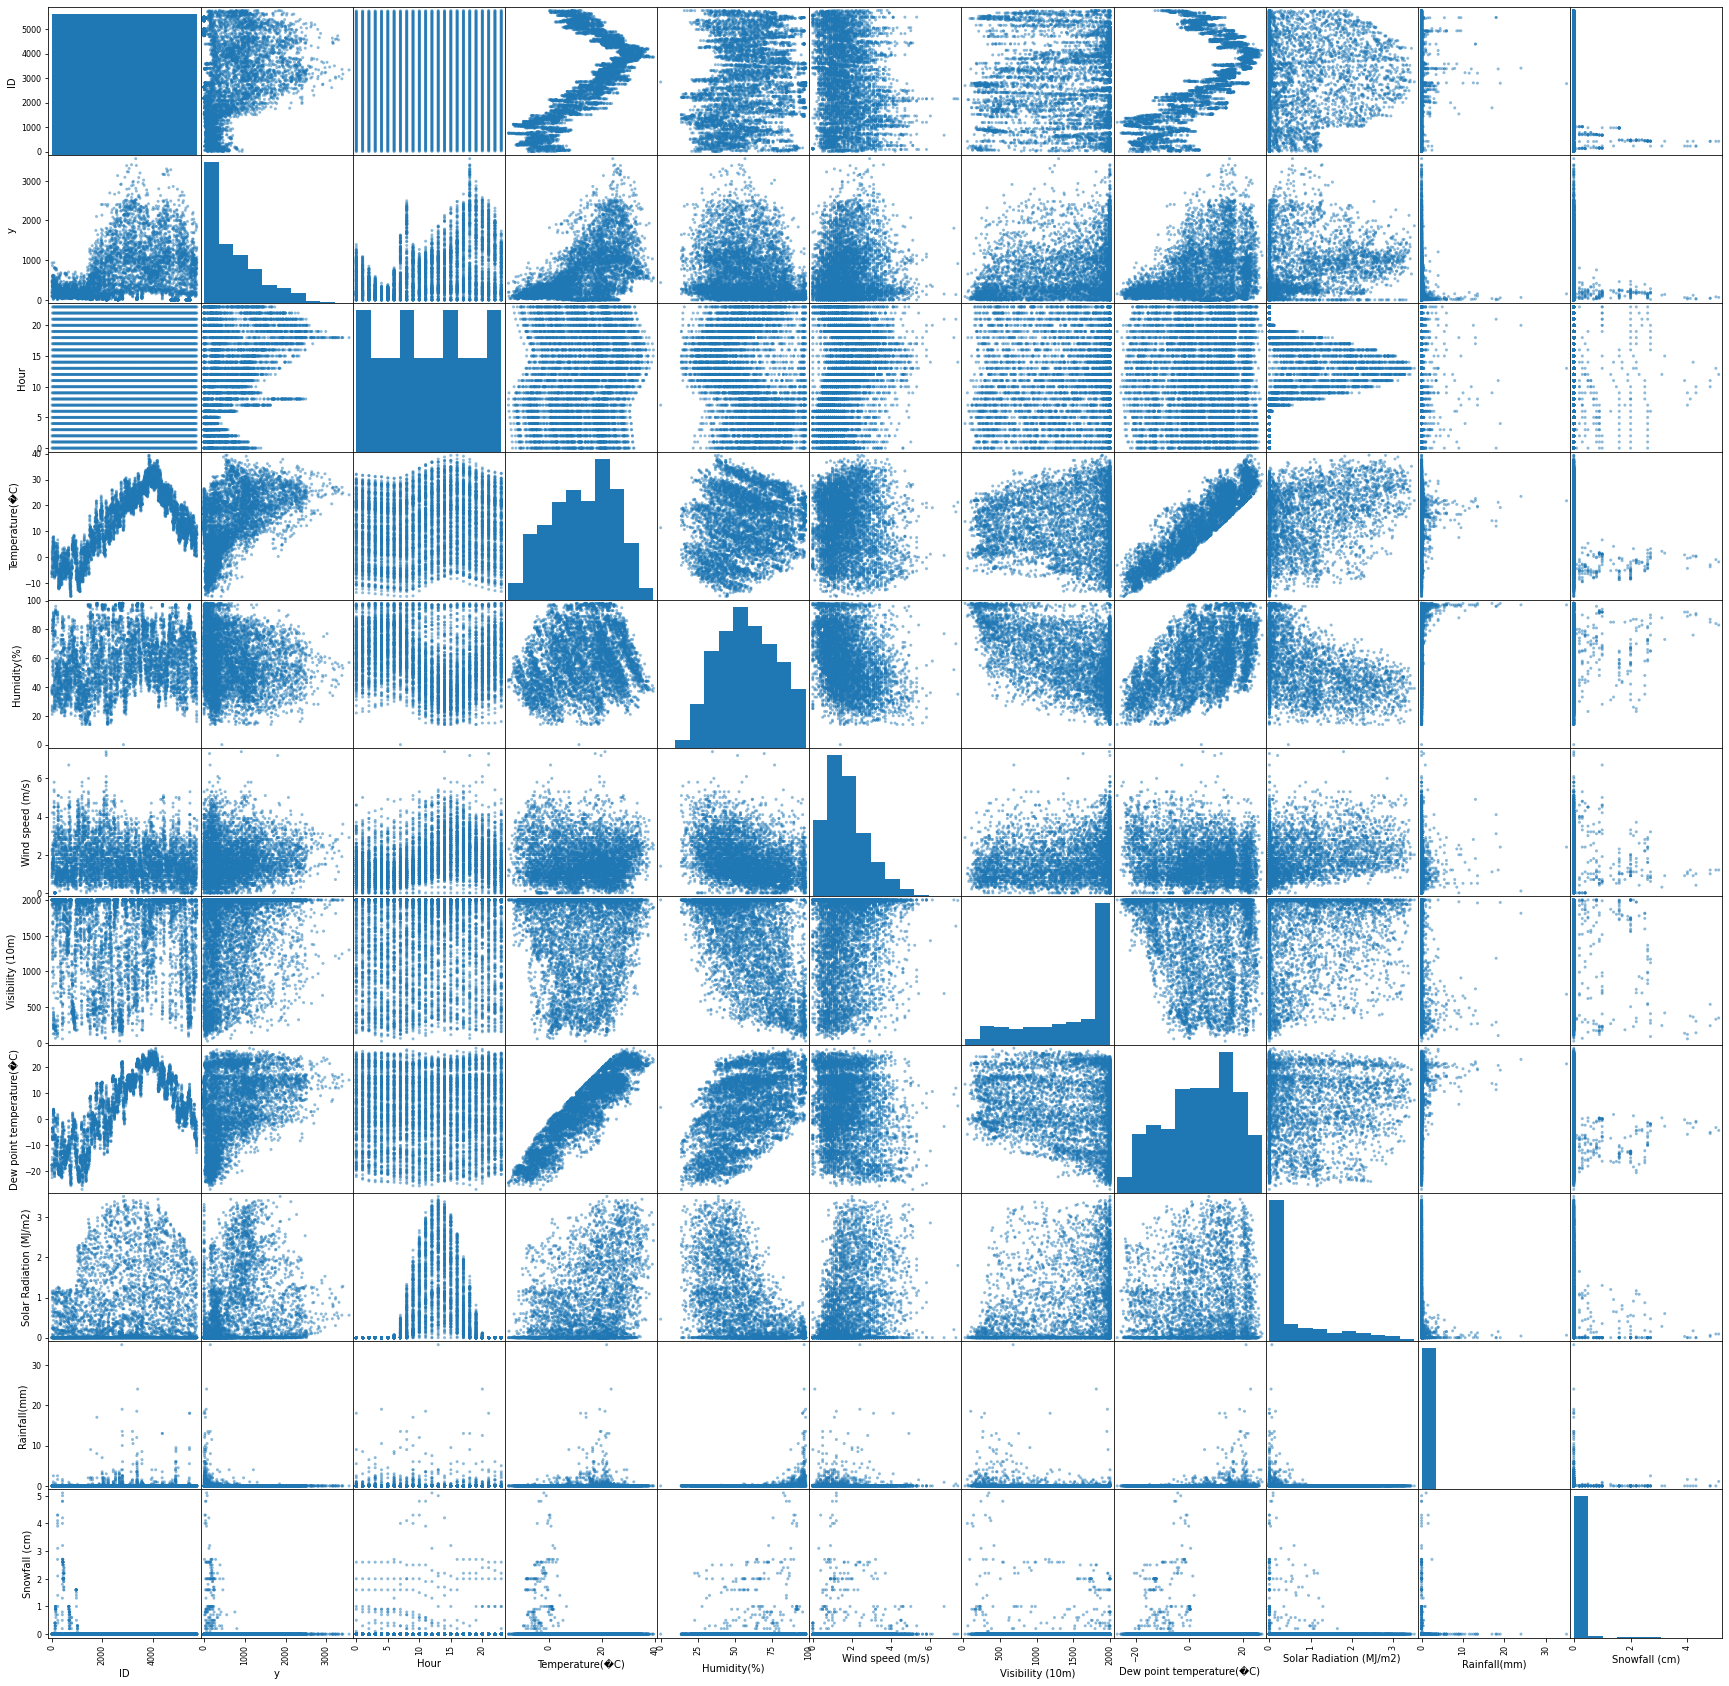

In [8]:
scatter_matrix(df, figsize=(30,30))
plt.show()

### Correalation Matrix

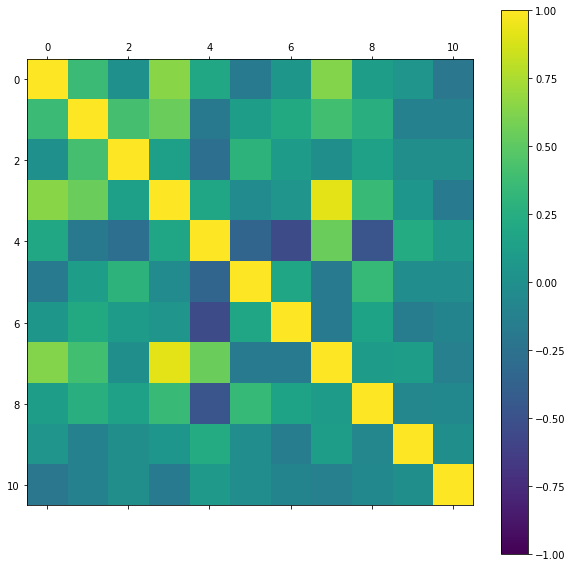

In [9]:
# Plot correlation matrix
correlations = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### Box Plot

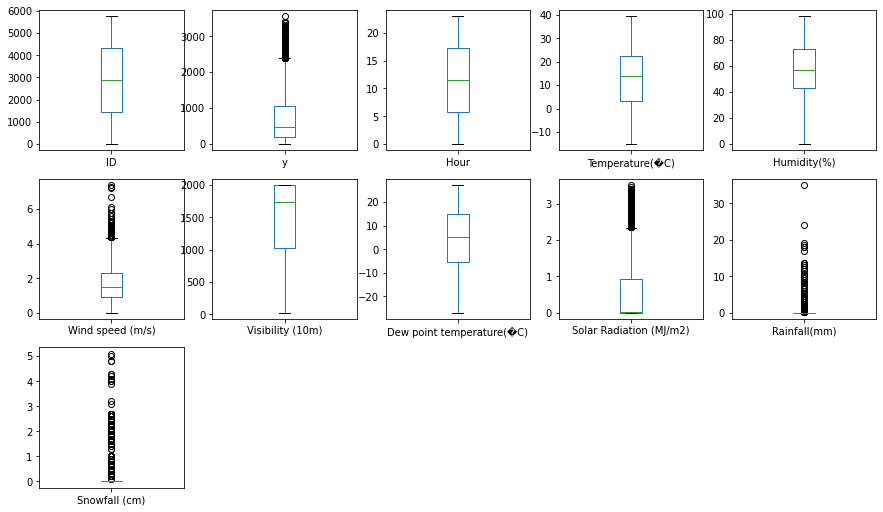

In [10]:
df.plot(kind='box', subplots=True, figsize=(15,15), layout=(5,5), sharex=False, sharey=False)
plt.show()

In [11]:
"""
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else('Day'))
df['Mean_temp'] = df[['Temperature(�C)','Dew point temperature(�C)']].mean(axis=1)
df['label_hot_cold']=df['Mean_temp'].apply(lambda x : 'cold' if (x < 15) else('average' if (15 <=x<= 25) else('hot')))
df.Date = pd.to_datetime(df.Date)
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].astype(str)
df['DayOfWeek'] = df['Date'].dt.weekday
df['DayOfWeek'] = df['DayOfWeek'].astype(str)
df['label_humidity'] = df['Humidity(%)'].apply(lambda x : 'high' if (x >= 50) else ('low'))

df.Date = pd.to_datetime(df.Date)
#df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.weekday
df['label_weekend'] = df['Day'].apply(lambda x : 'yes' if (x == 5 or x == 6) else ('no'))
df.head()

df.Date = pd.to_datetime(df.Date)
df['Year'] = df['Date'].dt.year
#df['Year'] = df['Year'].astype(str)
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['dow'] =  df['Date'].dt.dayofweek
df['doy'] =  df['Date'].dt.dayofyear
df['woy'] =  df['Date'].dt.weekofyear
#df.describe()
df['Year_part'] = df['Month'].apply(lambda x : '1st' if (1<=x<=3) else('2nd' if (4 <=x<= 6) else('3rd' if (7 <=x<= 9) else('4th'))))
#df['Month'] = df['Month'].astype(str)
"""

"\ndf['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else('Day'))\ndf['Mean_temp'] = df[['Temperature(�C)','Dew point temperature(�C)']].mean(axis=1)\ndf['label_hot_cold']=df['Mean_temp'].apply(lambda x : 'cold' if (x < 15) else('average' if (15 <=x<= 25) else('hot')))\ndf.Date = pd.to_datetime(df.Date)\ndf['Month'] = df['Date'].dt.month\ndf['Month'] = df['Month'].astype(str)\ndf['DayOfWeek'] = df['Date'].dt.weekday\ndf['DayOfWeek'] = df['DayOfWeek'].astype(str)\ndf['label_humidity'] = df['Humidity(%)'].apply(lambda x : 'high' if (x >= 50) else ('low'))\n\ndf.Date = pd.to_datetime(df.Date)\n#df['Day'] = df['Date'].dt.day\ndf['DayOfWeek'] = df['Date'].dt.weekday\ndf['label_weekend'] = df['Day'].apply(lambda x : 'yes' if (x == 5 or x == 6) else ('no'))\ndf.head()\n\ndf.Date = pd.to_datetime(df.Date)\ndf['Year'] = df['Date'].dt.year\n#df['Year'] = df['Year'].astype(str)\ndf['Month'] = df['Date'].dt.month\ndf['Day'] = df['Date'].dt.day\ndf['dow'] =  df['Date'].dt.

### Target vs Numeric Features

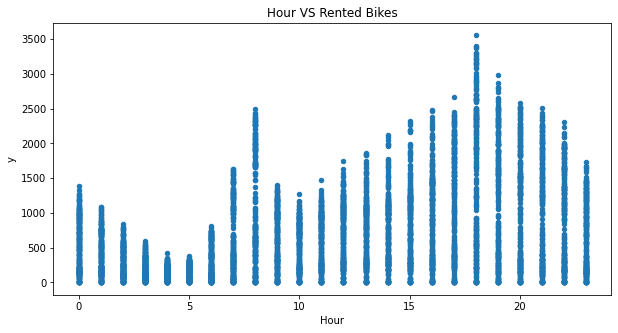

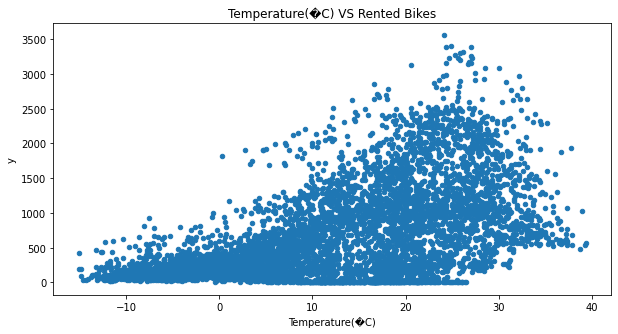

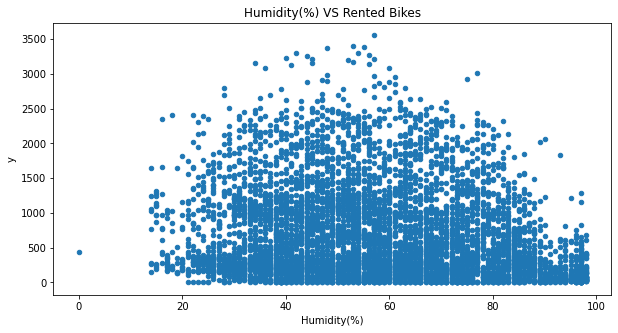

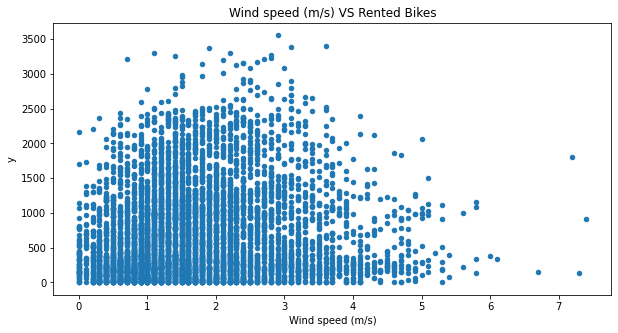

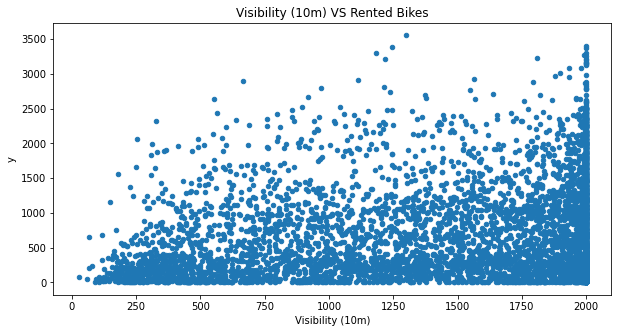

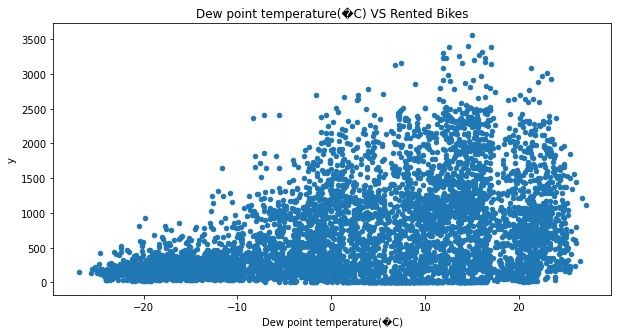

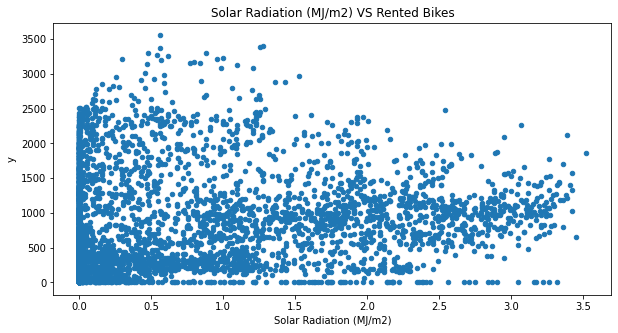

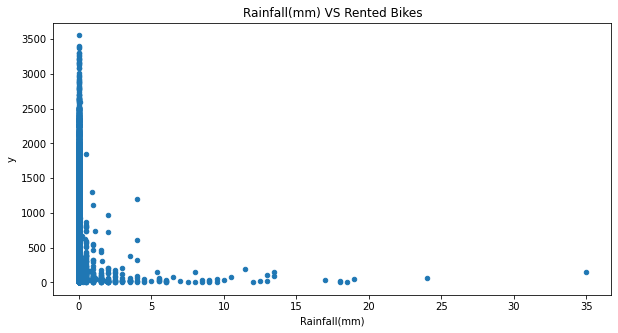

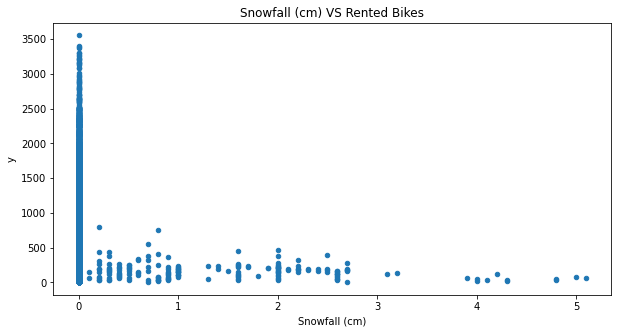

In [12]:
ContinuousCols=['Hour','Temperature(�C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(�C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='y', figsize=(10,5), title=predictor+" VS "+ 'Rented Bikes')

### Target vs Categorical Features

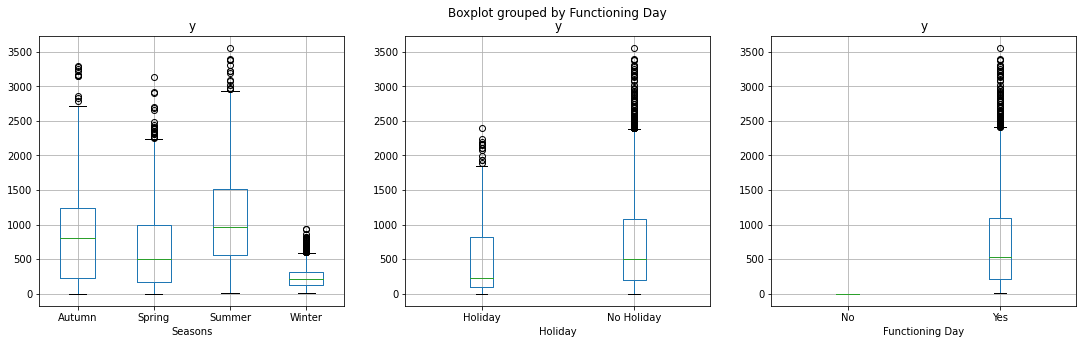

In [13]:
CategoricalColsList=['Seasons', 'Holiday', 'Functioning Day']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='y', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [14]:
#np.sqrt(df['y']).hist()

## Data Preparation

In [15]:
Q1 = df[['y']].quantile(0.25)
Q3 = df[['y']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['y']] < (Q1 - 1.5 * IQR)) |(df[['y']] > (Q3 + 1.5 * IQR))).any(axis=1)]
#df = df[df['Wind speed (m/s)']!=0]
dataset = df.drop(columns=['y'])

In [16]:
def add_features(dataset, df1):
    #dataset['label_day_night'] = dataset['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else('Day'))
    dataset['label_day_night'] = dataset['Hour'].apply(lambda x : 1 if (x >=5 or x<=12) else(2 if (x >12 or x<=17) else(3 if (x >17 or x<=21) else(4))) )
    dataset['Mean_temp'] = dataset[['Temperature(�C)','Dew point temperature(�C)']].mean(axis=1)
    dataset['label_hot_cold'] = dataset['Mean_temp'].apply(lambda x : 0 if (x <= 10) else(2 if (10 <x<= 18) else(3 if (18 <x<= 25) else(4 if (25 <x<= 32) else(1)))))
    #dataset["bad_humidity"]=0.6215*(dataset["Mean_temp"])+35.74-35.75*(dataset["Wind speed (m/s)"]**0.16)+0.4275*(dataset["Wind speed (m/s)"]**0.16)
    #dataset["bad_humidity"]=9/5*dataset["Temperature(�C)"]-0.55*(1-dataset["Humidity(%)"]/100)*(9/5*dataset["Temperature(�C)"]-26)+3
    #dataset['label_hot_cold'] = dataset['Mean_temp'].apply(lambda x : 'cold' if (x < 15) else('average' if (15 <=x<= 25) else('hot')))
    #dataset['label_hot_cold'] = dataset['Mean_temp'].apply(lambda x : 1 if (x < 15) else(2 if (15 <=x<= 23) else(3 if (23 <=x<= 30) else(4))))
    #dataset['label_hot_cold'] = dataset['Mean_temp'].apply(lambda x : 1 if (x < 15) else(2 if (15 <=x<= 23) else(3 if (23 <=x<= 30) else(4))))
    #dataset['label_humidity'] = dataset['Humidity(%)'].apply(lambda x : 1 if (x >= 50) else (0))
    #dataset['label_humidity'] = dataset['Humidity(%)'].apply(lambda x : 'high' if (x >= 50) else ('low'))
    #dataset['label_sr'] = dataset['Solar Radiation (MJ/m2)'].apply(lambda x : 1 if (x >= 2.5) else (0))
    #dataset['label_ws'] = dataset['Wind speed (m/s)'].apply(lambda x : 1 if (x < 3) else(2 if (3 <=x<= 5) else(4)))
    #dataset['Seasons'] = dataset['Seasons'].apply(lambda x : 4 if (x == 'Summer') else(3 if (x == 'Autumn') else(2 if(x=='Spring') else(1))))
    #dataset["avg_temp_season"] = (dataset.groupby("Month")["Mean_temp"].transform("mean"))
    #dataset['label_hot_month'] = dataset['avg_temp_season'].apply(lambda x : 1 if (x < 15) else(2 if (15 <=x<= 23) else(3 if (23 <=x<= 30) else(4))))

    #dataset['label_Visibility (10m)'] = dataset['Visibility (10m)'].apply(lambda x : 1 if (x < 200) else (2 if (x <= 200 and x<=1000) else (3)))
    #dataset['Wind speed (m/s)'] = dataset['Wind speed (m/s)'].apply (lambda x: np.log1p(x))
    #dataset['Visibility (10m)'] = dataset['Visibility (10m)'].apply (lambda x: np.power(x,10))
    #dataset['Snowfall (cm)']=dataset['Snowfall (cm)'].apply(lambda x : x/1000)
    #dataset['Rainfall(mm)']=dataset['Rainfall(mm)'].apply(lambda x : (x-5)*0.75)
    #power = PowerTransformer(method='yeo-johnson', standardize=True)
    #dataset["avg_temp"] = (dataset.groupby(["Year","Month",'Day'])["Mean_temp"].transform("mean"))
    #dataset["avg_hum"] = (dataset.groupby(["Year","Month",'Day'])["Humidity(%)"].transform("mean"))
    dataset["avg_rain"] = (dataset.groupby(["Year","Month",'Day'])["Rainfall(mm)"].transform("mean"))
    #dataset["avg_snow"] = (dataset.groupby(["Year","Month",'Day'])["Snowfall (cm)"].transform("mean"))
    #dataset["temp_season"] = (dataset.groupby(["Year","Seasons"])["Mean_temp"].transform("mean"))
    #dataset["hum_season"] = (dataset.groupby(["Year","Seasons"])["Humidity(%)"].transform("mean"))
    dataset["rain_season"] = (dataset.groupby(["Year","Seasons"])["Rainfall(mm)"].transform("mean"))
    #dataset["snow_season"] = (dataset.groupby(["Year","Seasons"])["Snowfall (cm)"].transform("mean"))
    #dataset["vis_hour"] = (dataset.groupby(["Year","Month",'Day'])['Visibility (10m)'].transform("mean"))
    #dataset["solar_hour"] = (dataset.groupby(["Year","Month",'Day'])['Solar Radiation (MJ/m2)'].transform("mean"))
    #dataset["holiday_week"] = (dataset.groupby(["Year","WeekOfYear"])['Holiday'].transform("sum"))
    #dataset["wind_week"] = (dataset.groupby(["Year","Month",'Day'])["Wind speed (m/s)"].transform("mean"))
    #dataset["avg_solar"] = (dataset.groupby(["Year","Month",'Day'])["Solar Radiation (MJ/m2)"].transform("mean"))
    power = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    #dataset['Wind speed (m/s)']= power.fit_transform(dataset['Wind speed (m/s)'].values.reshape(-1,1))
    #dataset['Visibility (10m)'] = power.fit_transform(dataset['Visibility (10m)'].values.reshape(-1,1))
    #dataset['Snowfall (cm)'] = power.fit_transform(dataset['Snowfall (cm)'].values.reshape(-1,1))
    #dataset['Rainfall(mm)'] = power.fit_transform(dataset['Rainfall(mm)'].values.reshape(-1,1))
    #dataset['Solar Radiation (MJ/m2)'] = power.fit_transform( dataset['Solar Radiation (MJ/m2)'].values.reshape(-1,1))

    #dataset['avg_temp']= power.fit_transform(dataset['avg_temp'].values.reshape(-1,1))
    #dataset['avg_hum'] = power.fit_transform(dataset['avg_hum'].values.reshape(-1,1))
    #dataset['avg_rain'] = power.fit_transform(dataset['avg_rain'].values.reshape(-1,1))
    #dataset['avg_snow'] = power.fit_transform(dataset['avg_snow'].values.reshape(-1,1))
    
    #scaler = MinMaxScaler(feature_range=(1, 2))
    #pipeline = Pipeline(steps=[('s', scaler),('p', power)])
    #df['Wind speed (m/s)']= pipeline.fit_transform(df['Wind speed (m/s)'].values.reshape(-1,1))
    #df['Visibility (10m)'] = pipeline.fit_transform(df['Visibility (10m)'].values.reshape(-1,1))
    #df['Snowfall (cm)'] = pipeline.fit_transform(df['Snowfall (cm)'].values.reshape(-1,1))
    #df['Rainfall(mm)'] = pipeline.fit_transform(df['Rainfall(mm)'].values.reshape(-1,1))
    #df['Solar Radiation (MJ/m2)'] = pipeline.fit_transform(df['Solar Radiation (MJ/m2)'].values.reshape(-1,1))
    return dataset

In [17]:
def decompose_date(df):
    def year_part(row):
        if row['Year']==2017 and row['Year_part']==1:
            return 1
        elif row['Year']==2017 and row['Year_part']==2:
            return 2
        elif row['Year']==2017 and row['Year_part']==3:
            return 3
        elif row['Year']==2017 and row['Year_part']==4:
            return 4
        elif row['Year']==2018 and row['Year_part']==1:
            return 5
        elif row['Year']==2018 and row['Year_part']==2:
            return 6
        elif row['Year']==2018 and row['Year_part']==3:
            return 7
        elif row['Year']==2018 and row['Year_part']==4:
            return 8

    def hour_part(row):
      if row['Hour']<8:
          return 1
      elif row['Hour']>=22:
          return 2
      elif row['Hour']>9 and  row['Hour']<18:
          return 3
      elif row['Hour']==8:
          return 4
      elif row['Hour']==9:
          return 5
      elif row['Hour']==20 or row['Hour']==21:
          return 6
      elif row['Hour']==18 or row['Hour']==19:
          return 7

    def non_working(row):
      if row['Holiday'] == 1 or row['label_weekend'] == 1:
          return 0
      else:
          return 1

    def climate(row):
      if row['Visibility (10m)'] >=500:
          return 1
      if row['Visibility (10m)'] <500:
          return 2
      if row['Rainfall(mm)'] >=10 and row['Rainfall(mm)'] <=50:
          return 3
      if row['Snowfall (cm)'] >=2:
          return 4

    def daytype(row):
      if row['Holiday']==0 and row['Functioning Day']=='No':
          return 1
      elif row['Holiday']==1:
          return 2
      elif row['Holiday'] ==0 and row['Functioning Day']=='Yes':
          return 3
    
    #df.Date = pd.to_datetime(df['Date'])
    df.Date = pd.DatetimeIndex(df.Date.values,dayfirst=True)
    df['Year']=(df['Date']+pd.to_timedelta(6-df['Date'].dt.weekday, unit='d')).dt.year
    #df.Date = pd.to_datetime(df.Date)
    df['Month'] = df['Date'].dt.month
    #df['Month'] = df['Month'].apply(lambda x : 3if (x==1) else (1if (x==2) else (2if (x==3) else (11if (x==4) else (6if (x==5) else (11 if (x==6) else (4if (x==7) else (9 if (x==8) else (7if (x==9) else (8if (x==10) else (5if (x==11) else (10))))))))))))
    #df['year'] = df['Date'].dt.year
    df['Year_part'] = df['Month'].apply(lambda x : 1 if (1<=x<=3) else(2 if (4 <=x<= 6) else(3 if (7 <=x<= 9) else(4))))
    df['YearQuarter'] = df.apply (lambda row: year_part(row), axis=1)
    #df['Year'] = df['Year'].apply(lambda x : 0 if (x==2017) else (1))
    df['Day'] = df['Date'].dt.day
    #df['Day'] = df['Day'].apply(lambda x : if (x==) else ())
    #df['Year'] = df['Year'].astype(str)
    df['DayOfWeek'] = df['Date'].dt.weekday
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['WeekOfYear'] = df['Date'].dt.weekofyear
    #df['DayOfWeek'] = df['DayOfWeek'].astype(str)
    df['label_weekend'] = df['DayOfWeek'].apply(lambda x : 1 if (x == 5 or x == 6) else (0))
    #df['label_weekend'] = df['DayOfWeek'].apply(lambda x : 1 if (x == 5 or x == 6) else (0))
    #df['label_rain'] = df['Rainfall(mm)'].apply(lambda x : 1 if (x < 10) else ( 2 if (x <= 10 and x <= 50) else(3)))
    #df['label_snow'] = df['Snowfall (cm)'].apply(lambda x : 1 if (x < 1) else ( 2 if (x <= 1 and x <= 5) else(3)))
    #df['label_Visibility (10m)'] = df['Visibility (10m)'].apply(lambda x : 1 if (x < 200) else (2 if (x <= 200 and x<=1000) else (3)))
    df['Holiday'] = df['Holiday'].apply(lambda x : 1 if (x == 'Holiday') else (0))
    #df['Seasons'] = df['Seasons'].apply(lambda x : 4 if (x == 'Summer') else (4 if (x == 'Summer') else (0)))
    df['RushHour']= df['Hour'].isin([8,17,18,19,20,21])
    df['lowHour']= df['Hour'].isin([0,1,2,3,4])
    #df['Morning'] = np.where((5 <= df.Hour) & (df.Hour <= 12), 1, 0)
    #df['Afternoon'] = np.where((12 < df.Hour) & (df.Hour <= 17), 1, 0)
    #df['Evening'] = np.where((17 < df.Hour) & (df.Hour <= 21), 1, 0)
    #df['Night'] = np.where((21 < df.Hour) | (df.Hour < 5 ), 1, 0)
    #df['day_type'] = df.apply(lambda row: daytype(row), axis=1)
    #df['Functioning Day'] = df['Functioning Day'].apply(lambda x : 1 if (x == 'Yes') else (0))
    #df["avg_temp_season"] = (df.groupby("Month")["Mean_temp"].transform("mean"))
    #df['label_hot_month'] = df['avg_temp_season'].apply(lambda x : 1 if (x < 15) else(2 if (15 <=x<= 23) else(3 if (23 <=x<= 30) else(4))))
    #df['Is_non_workday'] = df.apply (lambda row: non_working(row), axis=1)
    #df['Is_non_workday'] = df['Holiday'] + df['label_weekend']
    #df['Is_non_workday'] = df['Is_non_workday'].replace(1,2)
    #df = df.drop(['is_holiday','is_weekend'],axis=1)
    #df['Year_part'] = df['Month'].apply(lambda x : 1 if (1<=x<=3) else(2 if (4 <=x<= 6) else(3 if (7 <=x<= 9) else(4))))
    #df['YearQuarter'] = df.apply (lambda row: year_part(row), axis=1)
    df['Hour_part'] = df.apply (lambda row: hour_part(row), axis=1)
    #df['weather'] = df.apply(lambda row: climate(row), axis=1)
    #df['work_day'] = df.apply (lambda row: non_working(row), axis=1)
    #df['peak'] = df[['work_day', 'Hour']].apply(lambda x: (0, 1)[x['work_day']== 1 and ((x['Hour'] >=7 and x['Hour'] <=9) or (x['Hour'] >=17 and x['Hour'] <=19))], axis = 1)
    #df['label_night'] = df['Hour'].apply(lambda x: 1 if (x < 8 or x > 20) else(0)) 
    #df['year_season'] = df.Year + df.Seasons / 10
    #df['h_sin'] = np.sin(2 * np.pi * df['Hour'] / 23)
    #df['h_cos'] = np.cos(2 * np.pi * df['Hour'] / 23)

    #df['m_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    #df['m_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

    
    #df['dw_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 6)
    #df['dw_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 6)

    #df['dy_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
    #df['dy_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)

    #df['wy_sin'] = np.sin(2 * np.pi * df['WeekOfYear'] / 47)
    #df['wy_cos'] = np.cos(2 * np.pi * df['WeekOfYear'] / 47)
    
    return df

In [18]:

def encode_data(df):
    #categoric = ['Seasons', 'label_day_night', 'Functioning Day', 'label_humidity']
    categoric = ['Seasons', 'Functioning Day']
    label_encoder = preprocessing.LabelEncoder()
    for feature in categoric:
        df[feature] = label_encoder.fit_transform(df[feature])
    df = pd.get_dummies(df,columns=['Month','Year'])
    return df

In [19]:

def drop_columns(df):
    df = df.drop(columns=['ID','Date','Temperature(�C)','Dew point temperature(�C)','Year_part','Day'])
    #df = df.drop(columns=['ID','Date','Temperature(�C)','Dew point temperature(�C)'])
    #df = df.drop(columns=['ID','Date'])
    return df

In [20]:
def rescale_data(df):
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #scaler = StandardScaler()
    scaler = RobustScaler()
    return scaler.fit_transform(df)

In [21]:
def remove_low_varience(df):
    selector = VarianceThreshold(threshold=0.1)
    return selector.fit_transform(df)

In [22]:
def add_polynomial_features(df):
    trans = PolynomialFeatures(degree=2)
    return trans.fit_transform(df)

In [23]:
def perform_pca(df):
    pca = PCA(n_components=8)
    res = pca.fit_transform(df)
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_)
    plt.xlabel('PCA feature')
    plt.ylabel('variance')
    plt.xticks(features)
    plt.show()
    return res

In [24]:
def remove_outliers(df):
    
    numeric_var = ['Wind speed (m/s)']
    for i in numeric_var:
        q75, q25 = np.percentile(df.loc[:,i], [75, 25])
        iqr = q75 - q25
        Innerfence = q25 - (iqr*1.5)
        Upperfence = q75 + (iqr*1.5)
    
        # replace outliers with NA

        df.loc[df[i]<Innerfence, i] = np.nan
        df.loc[df[i]>Upperfence, i] = np.nan
        #print(df.isnull().sum())
        
        df[i] = df[i].fillna(df[i].median())

    return df
    """
    from sklearn.impute import KNNImputer
    df['Wind speed (m/s)'] = df['Wind speed (m/s)'].replace({0:np.nan})
    df['Humidity(%)'] = df['Humidity(%)'].replace({0:np.nan})
    imputer = KNNImputer(n_neighbors=10)
    df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
    return df
    """

In [25]:
def preprocess_data(df1):
    global df
    df1 = decompose_date(df1)
    df1 = add_features(df1,df)
    #df1 = lag(df1)
    #df1 = encode_time(df1)
    df1 = drop_columns(df1)
    #scatter_matrix(df1, figsize=(30,30))
    #plt.show()
    df1 = remove_outliers(df1)
    #df1['year_season'] = (df1.Year + df1.Seasons) / 10
    df1 = encode_data(df1)
    #df1['year_season'] = (df1.Year + df1.Seasons) / 10
    #df1 = df1.drop(columns=['year','month'])
    print(df1.info())
    print(df1.head())
    #df1 = lag(df1)
    #print(df1)
    #df1 = rescale_data(df1)
    #df1 = add_polynomial_features(df1)
    #df1 = perform_pca(df1)
    return df1

In [26]:
train_df = preprocess_data(dataset)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:75: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5651 entries, 0 to 5759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     5651 non-null   int64  
 1   Humidity(%)              5651 non-null   int64  
 2   Wind speed (m/s)         5651 non-null   float64
 3   Visibility (10m)         5651 non-null   int64  
 4   Solar Radiation (MJ/m2)  5651 non-null   float64
 5   Rainfall(mm)             5651 non-null   float64
 6   Snowfall (cm)            5651 non-null   float64
 7   Seasons                  5651 non-null   int64  
 8   Holiday                  5651 non-null   int64  
 9   Functioning Day          5651 non-null   int64  
 10  YearQuarter              5651 non-null   int64  
 11  DayOfWeek                5651 non-null   int64  
 12  DayOfYear                5651 non-null   int64  
 13  WeekOfYear               5651 non-null   int64  
 14  label_weekend           

## Spot Checking Models

## Fine Tuning Best Models

### Random Forest

### Hyper parameter Tuning

In [27]:
#y = df['y']
#x = train_df
#trainx, valx,trainy, valy = train_test_split(x, y, test_size=0.2)
"""
model =RandomForestRegressor()
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_estimators': [100,150,200,250,300,350], 'max_depth': [5,10,15,20,25], 'max_features':['auto', 'sqrt', 'log2'], 'max_leaf_nodes':[5,10,15]}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='neg_mean_squared_log_error')
grid.fit(trainx,trainy)
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)
"""

"\nmodel =RandomForestRegressor()\n# Create 3 folds\nseed = 13\nkfold = KFold(n_splits=3, shuffle=True, random_state=seed)\n# Define our candidate hyperparameters\nhp_candidates = [{'n_estimators': [100,150,200,250,300,350], 'max_depth': [5,10,15,20,25], 'max_features':['auto', 'sqrt', 'log2'], 'max_leaf_nodes':[5,10,15]}]\n# Search for best hyperparameters\ngrid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='neg_mean_squared_log_error')\ngrid.fit(trainx,trainy)\n# Get the results\nprint(grid.best_score_)\nprint(grid.best_estimator_)\nprint(grid.best_params_)\n"

In [28]:

from sklearn.linear_model import ElasticNetCV
#from skgarden import MondrianForestRegressor
y = df['y']
x = train_df
#4521..1130      4608..1152
#trainx, valx,trainy, valy = train_test_split(x, y, test_size=0.2)
#trainx = pd.DataFrame(x).head(4521)
#trainy = pd.DataFrame(y).head(4521)
#valx = pd.DataFrame(x).tail(1130)
#valy = pd.DataFrame(y).tail(1130)
trainx = x
trainy = y
"""
def trans(x,l1=0.3,l2=0):
    if l1!=0:
        return ((x+l2)**l1-1)/l1
    else:
        return np.log(x+l2)
def rev_trans(x,l1=0.3,l2=0):
    return (x*l1+1)**(1/l1)-l2
"""
#estimators = [('cb', CatBoostRegressor(verbose = 0)),('hist', HistGradientBoostingRegressor(max_bins= 150, max_depth=11, max_iter = 115, max_leaf_nodes= 15)), ('xg', XGBRegressor( max_depth = 9)), ('svr', SVR()),('rf',RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1))]
#finalmodel = StackingRegressor(estimators=estimators)
#finalmodel = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.2,min_child_weight =20, max_depth=20)
#finalmodel=HistGradientBoostingRegressor(max_bins= 150, max_depth=11, max_iter = 115, max_leaf_nodes= 15)
finalmodel=XGBRegressor( colsample_bytree = 0.8, learning_rate = 0.149,min_child_weight =25, max_depth = 3,  n_estimators = 450)
#finalmodel = MondrianForestRegressor(n_estimators = 400, random_state=1, n_jobs=-1)
finalmodel.fit(trainx,np.log1p(trainy))
##finalmodel.fit(trainx,trainy)
##results = finalmodel.predict(valx)
#results = np.round(np.exp(finalmodel.predict(valx))-1)
training_results = np.round(np.exp(finalmodel.predict(trainx))-1)
##training_results = finalmodel.predict(trainx)
print('Training Score: ', np.sqrt(mean_squared_log_error(trainy,abs(training_results))))
#msg = "%s: %f " % ('Validation Score: ', np.sqrt(mean_squared_log_error(valy,abs(results))))
#print(msg)

Training Score:  0.2179265617380762


[1.3409078e-02 1.2938953e-02 3.9873840e-04 1.0687816e-03 1.6858844e-03
 1.5589185e-02 3.5333792e-03 2.9816456e-02 1.5933302e-03 6.1617368e-01
 1.1448496e-01 4.2010252e-03 4.4611786e-03 5.6281467e-03 2.6767589e-03
 2.3555292e-02 1.9778628e-03 2.2147790e-02 0.0000000e+00 8.6693754e-03
 3.3396464e-03 3.4053391e-03 8.6065337e-02 0.0000000e+00 4.0491400e-03
 1.7954957e-03 1.2014620e-03 4.1216076e-04 4.4819312e-03 1.1741174e-03
 2.3882424e-03 3.9722733e-04 5.3785127e-03 1.9015989e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


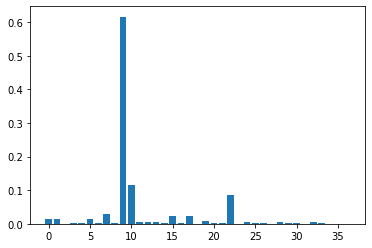

In [29]:
print(finalmodel.feature_importances_)
# plot
plt.bar(range(len(finalmodel.feature_importances_)), finalmodel.feature_importances_)
plt.show()

In [30]:
"""
history = []
for t in range(len(trainx)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print(np.sqrt(mean_squared_log_error(trainy,np.abs(history))))
"""

'\nhistory = []\nfor t in range(len(trainx)):\n    model = ARIMA(history, order=(5,1,0))\n    model_fit = model.fit()\n    output = model_fit.forecast()\n    yhat = output[0]\n    predictions.append(yhat)\n    obs = test[t]\n    history.append(obs)\nprint(np.sqrt(mean_squared_log_error(trainy,np.abs(history))))\n'

In [31]:
"""
finalmodel = CatBoostRegressor()
finalmodel.fit(trainx,np.log1p(trainy))
results = np.exp(finalmodel.predict(valx))-1
training_results = np.exp(finalmodel.predict(trainx))-1
print('Training Score: ', np.sqrt(mean_squared_log_error(trainy,abs(training_results))))
msg = "%s: %f " % ('Validation Score: ', np.sqrt(mean_squared_log_error(valy,abs(results))))
print(msg)
"""

'\nfinalmodel = CatBoostRegressor()\nfinalmodel.fit(trainx,np.log1p(trainy))\nresults = np.exp(finalmodel.predict(valx))-1\ntraining_results = np.exp(finalmodel.predict(trainx))-1\nprint(\'Training Score: \', np.sqrt(mean_squared_log_error(trainy,abs(training_results))))\nmsg = "%s: %f " % (\'Validation Score: \', np.sqrt(mean_squared_log_error(valy,abs(results))))\nprint(msg)\n'

## Test File Submission

In [32]:
#X_test['lag_1'] = edf['y'].shift(1)
#X_test['lag_1'].fillna(X_test['lag_1'].median(), inplace=True)
X_test = preprocess_data(edf)
y_test_predicted = abs((np.exp(finalmodel.predict(X_test))-1))
edf['y'] = y_test_predicted
edf[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hour                     3000 non-null   int64  
 1   Humidity(%)              3000 non-null   int64  
 2   Wind speed (m/s)         3000 non-null   float64
 3   Visibility (10m)         3000 non-null   int64  
 4   Solar Radiation (MJ/m2)  3000 non-null   float64
 5   Rainfall(mm)             3000 non-null   float64
 6   Snowfall (cm)            3000 non-null   float64
 7   Seasons                  3000 non-null   int64  
 8   Holiday                  3000 non-null   int64  
 9   Functioning Day          3000 non-null   int64  
 10  YearQuarter              3000 non-null   int64  
 11  DayOfWeek                3000 non-null   int64  
 12  DayOfYear                3000 non-null   int64  
 13  WeekOfYear               3000 non-null   int64  
 14  label_weekend           

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:75: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
